In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)
plt.rcParams['axes.linewidth']=2.5
plt.rcParams['ytick.major.width'] = 2.5
#plt.rcParams['xtick.top'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False


In [44]:
kin_data = pd.read_excel('../data/flamholz_et_al_kinetic_data_modified_20190611.xlsx','kinetic_data')
kin_data = kin_data[~kin_data.vC.isna()]
kin_data['binomial'] = kin_data['Unnamed: 0'].apply(lambda x: " ".join(x.split(' ')[:2]))
lit_data = kin_data[['binomial','isoform']].drop_duplicates()
lit_data.to_csv('lit_data_raw.csv')

In [52]:
measured_types

type
I              217
other types      8
Name: binomial, dtype: int64

type
type\nI         217
other\ntypes      8
Name: binomial, dtype: int64

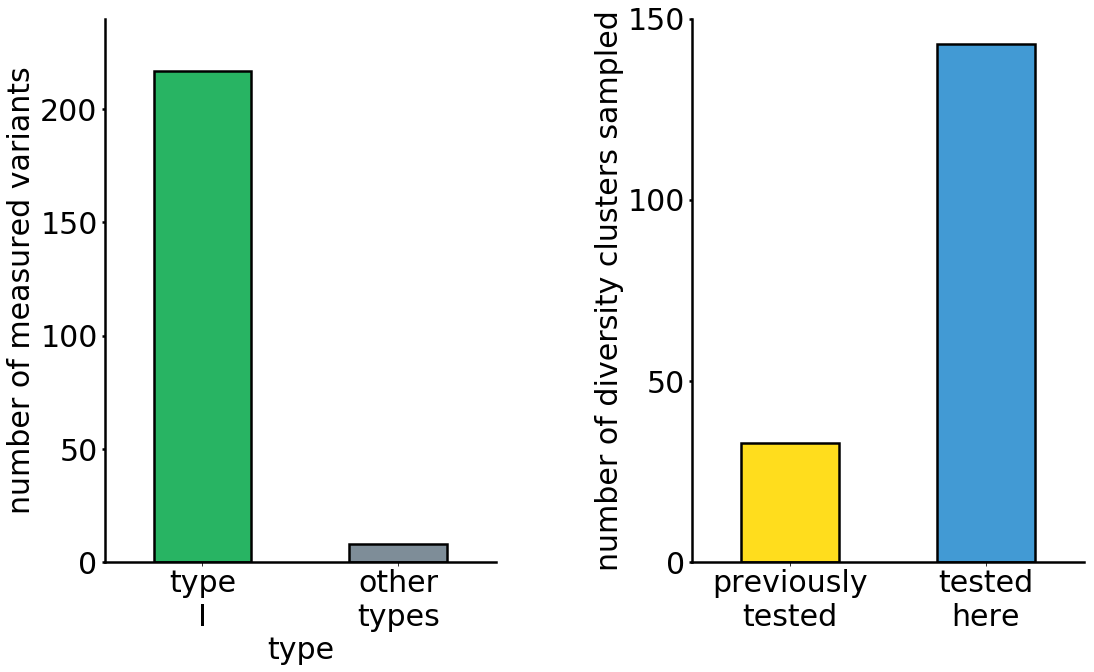

In [26]:
plt.subplots(1,2,figsize=(17,10))
lit_data = pd.read_csv('lit_data.csv')
lit_data = lit_data[lit_data.Remove !=1]
lit_data.loc[lit_data.isoform=='1','type'] = 'type\nI'
lit_data.loc[lit_data.isoform!='1','type'] = 'other\ntypes'
measured_types = lit_data.groupby('type').binomial.nunique()
measured_types.sort_values(ascending=False,inplace=True)
ax = plt.subplot(1,2,1)
#ax = measured_types.plot.bar(color=colors,figsize=(5,7))
measured_types.plot.bar(color=['#28b463','#7e8d98'],ax=ax,edgecolor='k',linewidth=2.5,rot=0)
ax.set_ylabel('number of measured variants')
ax.set_yticks([0,50,100,150,200])
ax.set_ylim([0,240])


p90_clusters = pd.read_csv('../output/02_90p_autotrophic_rubisco_tree/old_auto_uclust_all_0.9.csv')
kin_data = pd.read_csv('../output/02_90p_autotrophic_rubisco_tree/old_auto_kinetic_data.csv',names=['kinetic_ID'])
syn_data = pd.read_csv('../data/old_syn_labels.csv',names=['syn_ID'])
uclust_k = p90_clusters.merge(kin_data,left_on='Query',right_on='kinetic_ID')

uclust_s = p90_clusters.merge(syn_data,left_on='Query',right_on='syn_ID')
p90_res = pd.Series([uclust_k.Target.nunique(),uclust_s.Target.nunique()],index=['previously\ntested','tested\nhere'])
ax2 = plt.subplot(1,2,2)
p90_res.plot.bar(color=['#ffdd1d','#429ad4'],ax=ax2,legend=False,edgecolor='k',linewidth=2.5,rot=0)
ax2.set_ylabel('number of diversity clusters sampled')
ax2.set_yticks([0,50,100,150])
ax2.set_ylim([0,150])
plt.subplots_adjust(left=0.1,right=0.9,wspace=0.5)
plt.savefig('fig2a_20190612.svg')

In [32]:
lit_data[lit_data.isoform.isin(['2','2_3'])]

,binomial,isoform,Remove,type
139,Methanococcoides burtonii,2_3,NaN,other\ntypes
185,Rhodopseudomonas palustris,2,NaN,other\ntypes
186,Rhodospirillum rubrum,2,NaN,other\ntypes
212,Thiobacillus denitrificans,2,NaN,other\ntypes


In [68]:
p90_clusters = pd.read_csv('../output/02_90p_autotrophic_rubisco_tree/true_uclust_all_0.9.csv')
p70_clusters = pd.read_csv('../output/01_70p_tree/uclust_all_0.7.csv')

type_data = pd.read_csv('../output/01_70p_tree/rubisco_types_70p.csv')

uclust_m = p90_clusters.merge(p70_clusters,left_on='Query',right_on='Query',suffixes=('_90','_70'))
uclust_m['ID'] = uclust_m['Target_70'].apply(lambda x: x.split(' ')[0])
uclust_mt= uclust_m.merge(type_data,left_on='ID',right_on='ID')
kin_data = pd.read_csv('../output/00_100p_tree/uclust_all_1_kinetic_data.csv')
#kin_data = pd.read_csv('../output/02_90p_autotrophic_rubisco_tree/old_auto_kinetic_data.csv',names=['kinetic_ID'])
uclust_mtk = uclust_mt.merge(kin_data,left_on='Query',right_on='kinetic_ID')
uclust_mtk.loc[uclust_mtk.type.isin(['IIIb','unknown']),'type'] = 'III'
#uclust_mtk.loc[uclust_mtk.type !='I','type'] = 'Other types'
uclust_mtk.Target

AttributeError: 'DataFrame' object has no attribute 'Target'

In [32]:
uclust_mtk.groupby('type').Target_90.nunique()

type
I         30
II         2
II/III     1
III        4
Name: Target_90, dtype: int64

In [31]:
uclust_mtk[uclust_mtk.type.isin(['II','II/III'])]

,Type_90,Cluster_90,Size_90,%Id_90,Strand_90,Qlo_90,Tlo_90,Alignment_90,Query,Target_90,...,Size_70,%Id_70,Strand_70,Qlo_70,Tlo_70,Alignment_70,Target_70,ID,type,kinetic_ID
0,H,8,459,99.6,.,0,0,459M,gi|488811507|ref|WP_002723913.1| MULTISPECIES:...,RBC2_44 gi|1062686077|ref|WP_069331322.1|,...,459,76.0,.,0,0,459M,RBCSeed_22 gi|740194019|ref|WP_038036007.1|,RBCSeed_22,II,gi|488811507|ref|WP_002723913.1| MULTISPECIES:...
1,H,21,466,99.6,.,0,0,466M,gi|132036|sp|P04718.1|RBL2_RHORU RecName: Full...,RBC4_14 gi|494538|pdb|1RBA|A,...,466,71.9,.,0,0,459M7D,RBCSeed_22 gi|740194019|ref|WP_038036007.1|,RBCSeed_22,II,gi|132036|sp|P04718.1|RBL2_RHORU RecName: Full...
194,C,961,1,*,*,*,*,*,RBC2_50 gi|499819577|ref|WP_011500311.1|,RBC2_50 gi|499819577|ref|WP_011500311.1|,...,474,84.4,.,0,0,474M,RBCSeed_14 gi|502802415|ref|WP_013037391.1|,RBCSeed_14,II/III,RBC2_50 gi|499819577|ref|WP_011500311.1|


In [27]:

colors = ['#28b463','#7e8d98']
ax = measured_types.plot.bar(color=colors,figsize=(5,7))
ax.set_ylabel('number of measured variants')
ax.set_yticks([0,50,100,150,200])
ax.set_ylim([0,240])

NameError: name 'measured_types' is not defined

In [ ]:
data = pd.read_csv('../output/01_70p_tree/uclust_all_0.7.csv')
type_data = pd.read_csv('../output/01_70p_tree/rubisco_types_70p.csv')
kin_data = pd.read_csv('../output/00_100p_tree/uclust_all_1_kinetic_data.csv')
data['ID'] = data.Target.apply(lambda x: x.split(' ')[0])
mdata = data.merge(type_data,left_on='ID',right_on='ID')
mdata_kin = mdata.merge(kin_data,left_on='Query',right_on='kinetic_ID')
mdata_kin.loc[mdata_kin.type.isin(['IIIb','unknown']),'type'] = 'III'
measured_types = mdata_kin.groupby('type')['Query'].count()

#measured_types.loc['IIIa'] = 0
#measured_types.loc['IIIc'] = 0
#measured_types.loc['III-like'] = 0

colors = ['#28b463','#e74c3c','#af7ac5','#3498db','#aed6f1','#5d6d7e','#ffbb07']
ax = measured_types.plot.bar(color=colors,logy=True)
ax.set_ylabel('number of measured variants')
ax.set_yticks([0,10,100,200])
ax.set_ylim([0.9,1000])
ax.set_yticks([1,10,100,1000])
ax.set_yticklabels([1,10,100,1000])
plt.savefig('fig2a_inset_num_measured_20190530b.svg')



In [25]:
#measured_types = mdata_kin.groupby('type')['Query'].count()
uclust_mtk

uclust_mtk.groupby('type').Target_90.nunique()

type
I         30
II         2
II/III     1
III        4
Name: Target_90, dtype: int64

In [24]:
uclust_mt[uclust_mt.Query.str.contains('226736656')]


,Type_90,Cluster_90,Size_90,%Id_90,Strand_90,Qlo_90,Tlo_90,Alignment_90,Query,Target_90,...,Cluster_70,Size_70,%Id_70,Strand_70,Qlo_70,Tlo_70,Alignment_70,Target_70,ID,type
670,H,527,473,90.5,.,0,0,473M,gi|226736656|sp|P0C917.1|RBL1B_ACIFR RecName: ...,gi|1124623634|ref|WP_074905032.1| form I ribul...,...,21,473,90.3,.,0,0,473M,RIFOXYD1_FULL_Betaproteobacteria_62_11_rifoxyd...,RIFOXYD1_FULL_Betaproteobacteria_62_11_rifoxyd...,I


In [21]:
p70_clusters[p70_clusters.Query.str.contains('226736656')]

,Type,Cluster,Size,%Id,Strand,Qlo,Tlo,Alignment,Query,Target
28007,H,21,473,90.3,.,0,0,473M,gi|226736656|sp|P0C917.1|RBL1B_ACIFR RecName: ...,RIFOXYD1_FULL_Betaproteobacteria_62_11_rifoxyd...
